<a href="https://colab.research.google.com/github/sagunkayastha/ILab_Tutorials/blob/master/NN_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import os

In [557]:
!wget https://raw.githubusercontent.com/sagunkayastha/ILab_Tutorials/master/ex2data1.txt
data = np.loadtxt(os.path.join('ex2data1.txt'), delimiter=',')
X, y = data[:, 0:2], data[:, 2]


--2019-08-29 09:36:41--  https://raw.githubusercontent.com/sagunkayastha/ILab_Tutorials/master/ex2data1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘ex2data1.txt.1’

ex2data1.txt.1      100%[===================>]   3.69K  --.-KB/s    in 0s      

2019-08-29 09:36:41 (55.2 MB/s) - ‘ex2data1.txt.1’ saved [3775/3775]



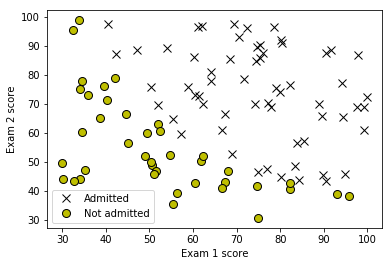

In [506]:
def plotData(X, y):
    
    pos = y == 1
    neg = y == 0

    plt.plot(X[pos, 0], X[pos, 1], 'kx', lw= 2, ms=8)
    plt.plot(X[neg,0], X[neg,1], 'ko',mfc='y', ms=8, mec='k', mew=1)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(['Admitted', 'Not admitted'])
plotData(X,y)    

**Normalize**

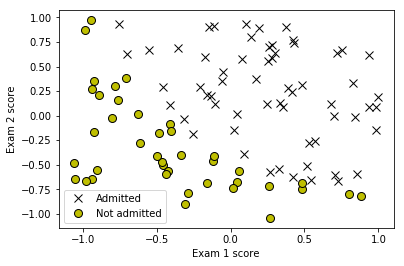

In [507]:
X = X - X.mean()
X = X / X.max()
plotData(X,y)    

**Checking shapes**

In [508]:

y=y.reshape(-1,1)

X,y= X.T,y.T
print('Shape X',X.shape)

print('Shape y',y.shape)

Shape X (2, 100)
Shape y (1, 100)


**Algorithm**


![alt text](https://render.githubusercontent.com/render/math?math=z%5E%7B%28i%29%7D%20%3D%20w%5ET%20x%5E%7B%28i%29%7D%20%2B%20b%20%5Ctag%7B1%7D&mode=display)

![alt text](https://render.githubusercontent.com/render/math?math=%5Chat%7By%7D%5E%7B%28i%29%7D%20%3D%20a%5E%7B%28i%29%7D%20%3D%20sigmoid%28z%5E%7B%28i%29%7D%29%5Ctag%7B2%7D&mode=display)

![alt text](https://render.githubusercontent.com/render/math?math=%5Cmathcal%7BL%7D%28a%5E%7B%28i%29%7D%2C%20y%5E%7B%28i%29%7D%29%20%3D%20%20-%20y%5E%7B%28i%29%7D%20%20%5Clog%28a%5E%7B%28i%29%7D%29%20-%20%281-y%5E%7B%28i%29%7D%20%29%20%20%5Clog%281-a%5E%7B%28i%29%7D%29%5Ctag%7B3%7D&mode=display)

**Calculate Loss**

![alt text](https://render.githubusercontent.com/render/math?math=J%20%3D%20%5Cfrac%7B1%7D%7Bm%7D%20%5Csum_%7Bi%3D1%7D%5Em%20%5Cmathcal%7BL%7D%28a%5E%7B%28i%29%7D%2C%20y%5E%7B%28i%29%7D%29%5Ctag%7B6%7D&mode=display)

**Gradient**

![alt text](https://render.githubusercontent.com/render/math?math=%5Cfrac%7B%5Cpartial%20J%7D%7B%5Cpartial%20w%7D%20%3D%20%5Cfrac%7B1%7D%7Bm%7DX%28A-Y%29%5ET%5Ctag%7B7%7D%24%24%24%24%20%5Cfrac%7B%5Cpartial%20J%7D%7B%5Cpartial%20b%7D%20%3D%20%5Cfrac%7B1%7D%7Bm%7D%20%5Csum_%7Bi%3D1%7D%5Em%20%28a%5E%7B%28i%29%7D-y%5E%7B%28i%29%7D%29%5Ctag%7B8%7D&mode=display)

In [0]:
def sigmoid(z):
    
    s = 1 / (1 + np.exp(-z))
    
    return s

## Initialization

In [0]:
def initialize_with_zeros(dim):
    
    w = np.zeros(shape=(dim,1))
    b = 0
    
    return w, b

## Forward Propagation

In [0]:
w,b = initialize_with_zeros(X.shape[0])
m=100
learning_rate=0.001

In [546]:
w.shape

(2, 1)

In [0]:
def propagate(w,b):
  z = np.dot(w.T,X)+b
  A = sigmoid(z)
  
  cost = (- 1 / m) * np.sum(y * np.log(A) + (1 - y) * (np.log(1 - A)))
  
  dw = (1 / m) * np.dot(X, (A - y).T)
  db = (1 / m) * np.sum(A - y)
  cost = np.squeeze(cost)
  
  grads ={'dw':dw,'db':db}
  return grads,cost



In [554]:
def optimize(w,b,learning_rate,num_of_iterations):
  
  for i in range(num_of_iterations):
    grads,cost = propagate(w,b)
    dw= grads['dw']
    db = grads['db']
    w = w - learning_rate * dw  
    b = b - learning_rate * db
    if i % 100 == 0:
      print(cost)
      
  return w,b

learning_rate=0.01
w,b=optimize(w,b,learning_rate,50000)


0.2043424627049964
0.20433862725252552
0.20433481063796563
0.2043310127585453
0.2043272335121308
0.2043234727972216
0.20431973051294577
0.20431600655905555
0.20431230083592283
0.20430861324453492
0.20430494368648977
0.2043012920639921
0.2042976582798488
0.20429404223746467
0.2042904438408383
0.20428686299455795
0.20428329960379685
0.20427975357430986
0.2042762248124286
0.20427271322505822
0.20426921871967235
0.20426574120430988
0.20426228058757093
0.20425883677861237
0.20425540968714445
0.20425199922342693
0.20424860529826458
0.20424522782300425
0.20424186670953068
0.20423852187026242
0.20423519321814887
0.20423188066666573
0.20422858412981196
0.2042253035221063
0.20422203875858264
0.20421878975478752
0.20421555642677647
0.2042123386911096
0.2042091364648492
0.20420594966555566
0.20420277821128416
0.20419962202058117
0.20419648101248158
0.20419335510650452
0.20419024422265072
0.20418714828139886
0.20418406720370252
0.2041810009109866
0.20417794932514455
0.20417491236853472
0.2041718899

In [555]:
m = X.shape[1]
Y_prediction = np.zeros((1, m))
w = w.reshape(X.shape[0], 1)
z = np.dot(w.T,X)+b
A = sigmoid(np.dot(w.T, X) + b)

for i in range(A.shape[1]):
      # Convert probabilities a[0,i] to actual predictions p[0,i]
      ### START CODE HERE ### (≈ 4 lines of code)
      Y_prediction[0,i] = 1 if A[0,i] > 0.5 else 0
      ### END CODE HERE ###
print(Y_prediction.shape)
print(y.shape)

(1, 100)
(1, 100)


In [556]:
from sklearn.metrics import accuracy_score
score =accuracy_score(y.T,Y_prediction.T)
score

0.89

# Final Model